* **Goal**: Festival and Customer Demographic Sales Analysis for Business - (This e-commerce analytics project explores customer behavior and sales trends using univariate, bivariate, and multivariate analysis. It reveals insights on demographics, product performance, and the impact of festivals on sales.)
* **Skill**: EDA

### EDA
* EDA is the process of data understanding on Validated data

* In statistics, Exploratory Data Analysis (EDA) is an approach of analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization methods.

* EDA will follow two concepts,

    * Stats
      * Descriptive
    * Visual Analysis

### TOC <a id='menu'>

* [0. Data](#dc)
* [1. Data Validation and Normalization](#dv)
* [2. EDA](#eda)
    * [2.1 Types of Variables/Columns](#vartype)
    * [2.2 Analysis](#ans)
        * [2.2.1 Uni-Variate Analysis](#uni)
        * [2.2.2 Bi-Variate Analysis](#bi)
        * [2.2.3 Multi-Variate Analysis](#mul)
    * [Insights](#insights)

### 0. Data

[Back to Menu](#menu)

In [5]:
# Base libraries
import pandas as pd
import numpy as np

# To supress warnings
import warnings
warnings.filterwarnings('ignore')

- The Data is Collected from:
        - https://www.kaggle.com/datasets/zeesolver/consumer-behavior-and-shopping-habits-dataset
- Some Synthatic Data is add for Best Analysis

In [7]:
# Data Loading

# connecting mysql to python pandas(jupyter notebook)
import mysql.connector  # or use sqlalchemy + pymysql

# add with our actual MySQL credentials
conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='Venky93@',
    database='e_commerce'
)

# querying our data
query = "SELECT * FROM `e-commerce_data`"
df = pd.read_sql(query, conn)

# Show the data
df

,Date,Festival,Product_Category,Sub_Category,Actual Price,Discount Price,Discount (%),Profit,Sales_Quantity,Age,Gender,Location,Review Rating,Previous Purchases,Frequency Of Purchases,Income,Browsing Time,Frequency,Festival Day Type
0,2024-04-12,Normal Days,Clothing,Blouse,96,53,44.79,43,5,55,Male,Kentucky,3.1,14,Fortnightly,141958,8,Low,Non-Festival Day
1,2024-12-14,Normal Days,Clothing,Sweater,97,64,34.02,33,6,19,Male,Maine,3.1,2,Fortnightly,35795,7,Low,Non-Festival Day
2,2024-09-27,Normal Days,Clothing,Jeans,92,73,20.65,19,4,50,Male,Massachusetts,3.1,23,Weekly,20860,28,Low,Non-Festival Day
3,2024-04-16,Normal Days,Footwear,Sandals,137,90,34.31,47,5,21,Male,Rhode Island,3.5,49,Weekly,123694,11,Low,Non-Festival Day
4,2024-03-12,Normal Days,Clothing,Blouse,61,49,19.67,12,3,45,Male,Oregon,2.7,31,Annually,148106,8,Low,Non-Festival Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,2024-01-25,Normal Days,Clothing,Hoodie,75,28,62.67,47,10,40,Female,Virginia,4.2,32,Weekly,54051,20,Low,Non-Festival Day
3896,2024-10-27,Normal Days,Accessories,Backpack,97,49,49.48,48,5,52,Female,Iowa,4.5,41,Bi-Weekly,69811,26,Low,Non-Festival Day
3897,2024-12-04,Normal Days,Accessories,Belt,70,33,52.86,37,4,46,Female,New Jersey,2.9,24,Quarterly,50447,20,Low,Non-Festival Day
3898,2024-09-23,Normal Days,Footwear,Shoes,98,77,21.43,21,9,44,Female,Minnesota,3.8,24,Weekly,148046,11,Low,Non-Festival Day


                                                        Basic Checks

In [9]:
df.shape

(3900, 19)

In [10]:
df.columns

Index(['Date', 'Festival', 'Product_Category', 'Sub_Category', 'Actual Price',
       'Discount Price', 'Discount (%)', 'Profit', 'Sales_Quantity', 'Age',
       'Gender', 'Location', 'Review Rating', 'Previous Purchases',
       'Frequency Of Purchases', 'Income', 'Browsing Time', 'Frequency',
       'Festival Day Type'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    3900 non-null   object 
 1   Festival                3900 non-null   object 
 2   Product_Category        3900 non-null   object 
 3   Sub_Category            3900 non-null   object 
 4   Actual Price            3900 non-null   int64  
 5   Discount Price          3900 non-null   int64  
 6   Discount (%)            3900 non-null   float64
 7   Profit                  3900 non-null   int64  
 8   Sales_Quantity          3900 non-null   int64  
 9   Age                     3900 non-null   int64  
 10  Gender                  3900 non-null   object 
 11  Location                3900 non-null   object 
 12  Review Rating           3900 non-null   float64
 13  Previous Purchases      3900 non-null   int64  
 14  Frequency Of Purchases  3900 non-null   

In [12]:
df

,Date,Festival,Product_Category,Sub_Category,Actual Price,Discount Price,Discount (%),Profit,Sales_Quantity,Age,Gender,Location,Review Rating,Previous Purchases,Frequency Of Purchases,Income,Browsing Time,Frequency,Festival Day Type
0,2024-04-12,Normal Days,Clothing,Blouse,96,53,44.79,43,5,55,Male,Kentucky,3.1,14,Fortnightly,141958,8,Low,Non-Festival Day
1,2024-12-14,Normal Days,Clothing,Sweater,97,64,34.02,33,6,19,Male,Maine,3.1,2,Fortnightly,35795,7,Low,Non-Festival Day
2,2024-09-27,Normal Days,Clothing,Jeans,92,73,20.65,19,4,50,Male,Massachusetts,3.1,23,Weekly,20860,28,Low,Non-Festival Day
3,2024-04-16,Normal Days,Footwear,Sandals,137,90,34.31,47,5,21,Male,Rhode Island,3.5,49,Weekly,123694,11,Low,Non-Festival Day
4,2024-03-12,Normal Days,Clothing,Blouse,61,49,19.67,12,3,45,Male,Oregon,2.7,31,Annually,148106,8,Low,Non-Festival Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,2024-01-25,Normal Days,Clothing,Hoodie,75,28,62.67,47,10,40,Female,Virginia,4.2,32,Weekly,54051,20,Low,Non-Festival Day
3896,2024-10-27,Normal Days,Accessories,Backpack,97,49,49.48,48,5,52,Female,Iowa,4.5,41,Bi-Weekly,69811,26,Low,Non-Festival Day
3897,2024-12-04,Normal Days,Accessories,Belt,70,33,52.86,37,4,46,Female,New Jersey,2.9,24,Quarterly,50447,20,Low,Non-Festival Day
3898,2024-09-23,Normal Days,Footwear,Shoes,98,77,21.43,21,9,44,Female,Minnesota,3.8,24,Weekly,148046,11,Low,Non-Festival Day


                                                                    Column Names

| **Column**                 | **What It Means**                                             | **How It Helps in Analysis**                         |
| -------------------------- | ------------------------------------------------------------- | ---------------------------------------------------- |
| **Age**                    | Customer’s age.                                               | Understand age-wise shopping habits and preferences. |
| **Gender**                 | Male or Female.                                               | Compare how men and women shop differently.          |
| **Sub\_Category**          | Specific product (like Jeans, Blouse).                        | See which products are popular.                |
| **Product\_Category**      | Main group of products (like Clothing, Electronics).          | Find out which product categories perform best.      |
| **Discount Price**         | Price after discount.                                         | Check if discounts are attracting buyers.            |
| **Location**               | Where the customer is from.                                   | See how sales across places.                    |
| **Review Rating**          | Customer’s rating of the product.                             | Know if customers are happy with products.           |
| **Previous Purchases**     | Number of times customer shopped before.                      | Identify loyal vs new customers.                     |
| **Frequency Of Purchases** | How often they buy (Weekly, Monthly, etc.).                   | Understand regular vs occasional buyers.             |
| **Income**                 | Customer’s income level.                                      | See how income affects buying patterns.              |
| **Date**                   | Date of purchase.                                             | Track sales trends over time.                        |
| **Festival**               | If purchase was during a festival or not.                     | Compare festival shopping vs normal days.            |
| **Actual Price**           | Price before any discount.                                    | Calculate how much discount was given.               |
| **Profit**                 | How much company earned from the sale.                        | Check which sales give good profit.                  |
| **Discount (%)**           | How much percentage discount was given.                       | Analyze effectiveness of offers.                     |
| **Browsing Time**          | Time spent by customer on the site before buying.             | See if longer browsing leads to buying or not.       |
| **Frequency**              | Frequency tag (Low, Medium, High) based on purchase activity. | Identify valuable customers.                         |
| **Sales\_Quantity**        | How many items were bought in that transaction.               | Helps track demand, especially during festivals.     |

| Festival                      | Date's                    | 
| -------------------------- | -------------------------- | 
| **Valentine’s Day**        | 02/14/2024                 | 
| **Easter Sales**           | 03/29 – 03/31/2024         | 
| **Mother’s Day**           | 05/12/2024                 | 
| **Father’s Day**           | 06/16/2024                 | 
| **Back to School Sales**   | 07/15 – 08/15/2024         | 
| **Amazon Prime Day**       | Mid-July (likely 07/16–17) |
| **Labor Day Weekend Sale** | 08/30 – 09/02/2024         | 
| **Halloween**              | 10/31/2024                 | 
| **Black Friday**           | 11/29/2024                 |
| **Cyber Monday**           | 12/02/2024                 | 
| **Green Monday**           | 12/09/2024                 | 
| **Christmas Sales**        | 12/21 – 12/24/2024         | 
| **Year-End Clearance**     | 12/26 – 12/31/2024         | 


### 1. Data Validation <a id='dv'>

[Back to Menu](#menu)

* Checking and validating each & every column data along with data type of column
* Duplicates Rows Handling
    - Checking and droping duplicated rows to overcome data leakage

**Column Data Validation**

In [19]:
# Taking a function for col data verification

def colcheck(df, col):
    print("Column: ", col)
    print()
    print(f"Number of Unique Values in Column: {df[col].nunique()}")
    print()
    print("Unique Values in Column:")
    print(df[col].unique())
    print()
    print("Data Type of Column:", df[col].dtype)
    print()
    print("***********************************************************")
    print()

* **Applying above function to each & every column**

In [21]:
for col in df.columns:
    colcheck(df, col)

Column:  Date

Number of Unique Values in Column: 366

Unique Values in Column:
['2024-04-12' '2024-12-14' '2024-09-27' '2024-04-16' '2024-03-12'
 '2024-07-07' '2024-01-21' '2024-05-01' '2024-08-02' '2024-11-26'
 '2024-03-28' '2024-04-09' '2024-12-25' '2024-05-31' '2024-05-10'
 '2024-05-29' '2024-11-04' '2024-09-14' '2024-12-09' '2024-10-20'
 '2024-07-10' '2024-10-03' '2024-06-09' '2024-11-09' '2024-01-22'
 '2024-09-09' '2024-08-23' '2024-12-10' '2024-02-18' '2024-02-28'
 '2024-06-18' '2024-07-06' '2024-07-08' '2024-06-23' '2024-02-20'
 '2024-12-29' '2024-02-24' '2024-08-31' '2024-11-15' '2024-11-02'
 '2024-05-14' '2024-11-24' '2024-06-15' '2024-09-30' '2024-03-29'
 '2024-11-11' '2024-01-14' '2024-08-29' '2024-09-21' '2024-12-11'
 '2024-02-22' '2024-12-05' '2024-04-01' '2024-09-20' '2024-02-04'
 '2024-07-24' '2024-03-21' '2024-02-19' '2024-01-02' '2024-02-23'
 '2024-04-15' '2024-09-16' '2024-11-05' '2024-07-09' '2024-08-05'
 '2024-02-13' '2024-06-10' '2024-07-20' '2024-09-26' '2024-12-

*  Taking Date Column as datetime Formate

In [23]:
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    3900 non-null   datetime64[ns]
 1   Festival                3900 non-null   object        
 2   Product_Category        3900 non-null   object        
 3   Sub_Category            3900 non-null   object        
 4   Actual Price            3900 non-null   int64         
 5   Discount Price          3900 non-null   int64         
 6   Discount (%)            3900 non-null   float64       
 7   Profit                  3900 non-null   int64         
 8   Sales_Quantity          3900 non-null   int64         
 9   Age                     3900 non-null   int64         
 10  Gender                  3900 non-null   object        
 11  Location                3900 non-null   object        
 12  Review Rating           3900 non-null   float64 

* Now the data is validated and all columns are in the correct datatype
The validated data is below

In [26]:
df.head()

,Date,Festival,Product_Category,Sub_Category,Actual Price,Discount Price,Discount (%),Profit,Sales_Quantity,Age,Gender,Location,Review Rating,Previous Purchases,Frequency Of Purchases,Income,Browsing Time,Frequency,Festival Day Type
0,2024-04-12,Normal Days,Clothing,Blouse,96,53,44.79,43,5,55,Male,Kentucky,3.1,14,Fortnightly,141958,8,Low,Non-Festival Day
1,2024-12-14,Normal Days,Clothing,Sweater,97,64,34.02,33,6,19,Male,Maine,3.1,2,Fortnightly,35795,7,Low,Non-Festival Day
2,2024-09-27,Normal Days,Clothing,Jeans,92,73,20.65,19,4,50,Male,Massachusetts,3.1,23,Weekly,20860,28,Low,Non-Festival Day
3,2024-04-16,Normal Days,Footwear,Sandals,137,90,34.31,47,5,21,Male,Rhode Island,3.5,49,Weekly,123694,11,Low,Non-Festival Day
4,2024-03-12,Normal Days,Clothing,Blouse,61,49,19.67,12,3,45,Male,Oregon,2.7,31,Annually,148106,8,Low,Non-Festival Day


In [27]:
df.tail()

,Date,Festival,Product_Category,Sub_Category,Actual Price,Discount Price,Discount (%),Profit,Sales_Quantity,Age,Gender,Location,Review Rating,Previous Purchases,Frequency Of Purchases,Income,Browsing Time,Frequency,Festival Day Type
3895,2024-01-25,Normal Days,Clothing,Hoodie,75,28,62.67,47,10,40,Female,Virginia,4.2,32,Weekly,54051,20,Low,Non-Festival Day
3896,2024-10-27,Normal Days,Accessories,Backpack,97,49,49.48,48,5,52,Female,Iowa,4.5,41,Bi-Weekly,69811,26,Low,Non-Festival Day
3897,2024-12-04,Normal Days,Accessories,Belt,70,33,52.86,37,4,46,Female,New Jersey,2.9,24,Quarterly,50447,20,Low,Non-Festival Day
3898,2024-09-23,Normal Days,Footwear,Shoes,98,77,21.43,21,9,44,Female,Minnesota,3.8,24,Weekly,148046,11,Low,Non-Festival Day
3899,2024-06-29,Normal Days,Accessories,Handbag,96,81,15.62,15,3,52,Female,California,3.1,33,Quarterly,103930,14,Low,Non-Festival Day


In [28]:
# Validating Col Data Types
df.dtypes

Date                      datetime64[ns]
Festival                          object
Product_Category                  object
Sub_Category                      object
Actual Price                       int64
Discount Price                     int64
Discount (%)                     float64
Profit                             int64
Sales_Quantity                     int64
Age                                int64
Gender                            object
Location                          object
Review Rating                    float64
Previous Purchases                 int64
Frequency Of Purchases            object
Income                             int64
Browsing Time                      int64
Frequency                         object
Festival Day Type                 object
dtype: object

**Duplicated rows**

In [30]:
# Converting Text Cols to lower case as python is case sensitive
for col in df.columns:
    if df[col].dtype==object:
        df[col] = df[col].str.lower()

In [31]:
# Duplicated Rows Check

df[df.duplicated()]

,Date,Festival,Product_Category,Sub_Category,Actual Price,Discount Price,Discount (%),Profit,Sales_Quantity,Age,Gender,Location,Review Rating,Previous Purchases,Frequency Of Purchases,Income,Browsing Time,Frequency,Festival Day Type


### 2.EDA(Data Insights from stats methods)


* **To get Insights on the data we can use eda techniques,**
    - **Uni-Variate Analysis (Study of single column data)**
    - **Bi/Multi-Variate Analysis (Study data between two or more columns)**
* Above techniques will use **Descriptive Stats** & **Visualizations**
    - **Descriptive Stats**
        - Stats Measures are used to understand column data
        - To start with descriptive stats , need to understand types of variables/columns in given data
    - **Visualizations**
        - Pictorial representation of data
            - Descriptive Stats Visual representation

**2.0 Pre-Requisites**

In [35]:
# Viz Libraries
! pip install plotly

import matplotlib.pyplot as plt
import seaborn as sns

from plotly.offline import init_notebook_mode
import plotly.express as px
import plotly.figure_factory as ff

from scipy.stats import skew, kurtosis
init_notebook_mode(connected=True)

# To supress warnings in Visualizations
import warnings
warnings.filterwarnings("ignore")

In [36]:
# Taking Non Null Data for Analysis

data = df.dropna().reset_index(drop=True)

In [37]:
df.columns

Index(['Date', 'Festival', 'Product_Category', 'Sub_Category', 'Actual Price',
       'Discount Price', 'Discount (%)', 'Profit', 'Sales_Quantity', 'Age',
       'Gender', 'Location', 'Review Rating', 'Previous Purchases',
       'Frequency Of Purchases', 'Income', 'Browsing Time', 'Frequency',
       'Festival Day Type'],
      dtype='object')

In [38]:
# Taking Columns in Order

data = data[['Age', 'Gender', 'Income', 'Location','Product_Category', 'Sub_Category', 'Actual Price', 'Discount Price', 'Discount (%)', 'Sales_Quantity','Previous Purchases', 'Frequency Of Purchases', 'Frequency', 'Browsing Time', 'Review Rating','Festival','Festival Day Type','Profit', 'Date']]
data

,Age,Gender,Income,Location,Product_Category,Sub_Category,Actual Price,Discount Price,Discount (%),Sales_Quantity,Previous Purchases,Frequency Of Purchases,Frequency,Browsing Time,Review Rating,Festival,Festival Day Type,Profit,Date
0,55,male,141958,kentucky,clothing,blouse,96,53,44.79,5,14,fortnightly,low,8,3.1,normal days,non-festival day,43,2024-04-12
1,19,male,35795,maine,clothing,sweater,97,64,34.02,6,2,fortnightly,low,7,3.1,normal days,non-festival day,33,2024-12-14
2,50,male,20860,massachusetts,clothing,jeans,92,73,20.65,4,23,weekly,low,28,3.1,normal days,non-festival day,19,2024-09-27
3,21,male,123694,rhode island,footwear,sandals,137,90,34.31,5,49,weekly,low,11,3.5,normal days,non-festival day,47,2024-04-16
4,45,male,148106,oregon,clothing,blouse,61,49,19.67,3,31,annually,low,8,2.7,normal days,non-festival day,12,2024-03-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,40,female,54051,virginia,clothing,hoodie,75,28,62.67,10,32,weekly,low,20,4.2,normal days,non-festival day,47,2024-01-25
3896,52,female,69811,iowa,accessories,backpack,97,49,49.48,5,41,bi-weekly,low,26,4.5,normal days,non-festival day,48,2024-10-27
3897,46,female,50447,new jersey,accessories,belt,70,33,52.86,4,24,quarterly,low,20,2.9,normal days,non-festival day,37,2024-12-04
3898,44,female,148046,minnesota,footwear,shoes,98,77,21.43,9,24,weekly,low,11,3.8,normal days,non-festival day,21,2024-09-23


**2.1 Identifying Variables Types according to stats** <a id='vartype'>
   
[Back to Menu](#menu)

In [40]:
data.shape

(3900, 19)

In [41]:
data.head()

,Age,Gender,Income,Location,Product_Category,Sub_Category,Actual Price,Discount Price,Discount (%),Sales_Quantity,Previous Purchases,Frequency Of Purchases,Frequency,Browsing Time,Review Rating,Festival,Festival Day Type,Profit,Date
0,55,male,141958,kentucky,clothing,blouse,96,53,44.79,5,14,fortnightly,low,8,3.1,normal days,non-festival day,43,2024-04-12
1,19,male,35795,maine,clothing,sweater,97,64,34.02,6,2,fortnightly,low,7,3.1,normal days,non-festival day,33,2024-12-14
2,50,male,20860,massachusetts,clothing,jeans,92,73,20.65,4,23,weekly,low,28,3.1,normal days,non-festival day,19,2024-09-27
3,21,male,123694,rhode island,footwear,sandals,137,90,34.31,5,49,weekly,low,11,3.5,normal days,non-festival day,47,2024-04-16
4,45,male,148106,oregon,clothing,blouse,61,49,19.67,3,31,annually,low,8,2.7,normal days,non-festival day,12,2024-03-12


Numerical (Quantitative) |Categorical (Qualitative)
-------------------------|----------
Age (NC)|Gender(CO)
Discount Price	(NC)|Sub_Category	(CN)
Previous Purchases	(NC)|Product_Category(CN)
Income(NC)|Location(CN)
Actual Price(NC)|Review Rating	(CN)
Date(ND)|Frequency Of Purchases	(C0)
Sales Quantity(ND)|Festival(CN)
Profit(NC)|
Discount (%)(NC)	|
Browsing Time(NC)	| 
Frequency(ND) |
Income(NC) |
      Note:

    NC - Numeric Continuous -(Real or integer numbers with a wide range, measurable.) 
    CO - Categorical Ordinal -(Categories with order (e.g., Low, Medium, High))      
    ND - Numeric Discrete -(Whole numbers, usually counts.) 
    CN - Categorical Nominal -(Categories with no order (e.g., Gender, Location).)

**2.2 Analysis** <a id='ans'>

[Back to Menu](#menu)

- Descriptive Stats Univariate measures,
    - Numeric
        - Discrete
            - round(Mean), round(Median), Mode, Skewness, Kurtosis
        - Continuous
            - - Mean, Median, Skewness, Kurtosis
    - Categorical & Boolean
        - nunique
        - unique
        - FDT
        - Mode
* Visualizations for Uni-Variate
    - Categorical: Comparision: Pie/Bar
    - Numerical: Distribution: Hist/Box/Density

In [45]:
data.head(2)

,Age,Gender,Income,Location,Product_Category,Sub_Category,Actual Price,Discount Price,Discount (%),Sales_Quantity,Previous Purchases,Frequency Of Purchases,Frequency,Browsing Time,Review Rating,Festival,Festival Day Type,Profit,Date
0,55,male,141958,kentucky,clothing,blouse,96,53,44.79,5,14,fortnightly,low,8,3.1,normal days,non-festival day,43,2024-04-12
1,19,male,35795,maine,clothing,sweater,97,64,34.02,6,2,fortnightly,low,7,3.1,normal days,non-festival day,33,2024-12-14


**2.2.1 Uni Variate Analysis**<a id='#uni'>

Uni variate Stats & Visuals 

[Back to Menu](#menu)


 CATEGORICAL VARIABLES STATS & PIE PLOTS

 Stats for Categorical Column: Product_Category
Unique Values Count: 3
Top Unique Values: ['clothing' 'outerwear' 'accessories']
Top Frequencies:
 Product_Category
clothing       593
accessories    345
outerwear      237
Name: count, dtype: int64
Mode: clothing


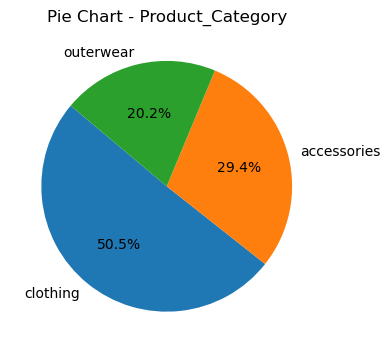


 Stats for Categorical Column: Sub_Category
Unique Values Count: 10
Top Unique Values: ['blouse' 'sweater' 'shirt' 'coat' 'dress']
Top Frequencies:
 Sub_Category
pants         127
shirt         126
coat          123
sunglasses    121
dress         118
Name: count, dtype: int64
Mode: pants


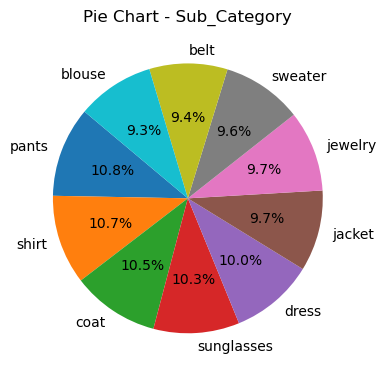


 Stats for Categorical Column: Gender
Unique Values Count: 2
Top Unique Values: ['male' 'female']
Top Frequencies:
 Gender
male      808
female    367
Name: count, dtype: int64
Mode: male


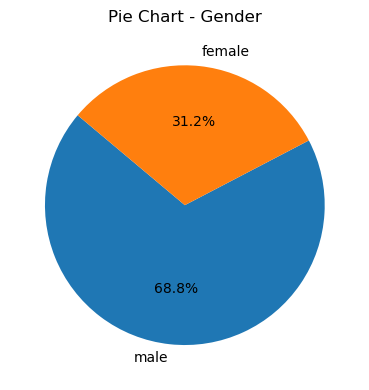


 Stats for Categorical Column: Frequency Of Purchases
Unique Values Count: 5
Top Unique Values: ['Fortnightly' 'Annually' 'Quarterly' 'Weekly' 'Monthly']
Top Frequencies:
 Frequency Of Purchases
Annually       249
Quarterly      245
Weekly         238
Monthly        222
Fortnightly    221
Name: count, dtype: int64
Mode: Annually


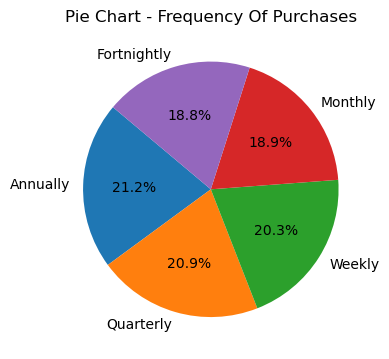


 NUMERICAL VARIABLES STATS & HISTOGRAM PLOTS

 Stats for Numerical Column: Browsing Time
Mean: 23.23
Median: 19.0
Mode: 23
Skewness: 1.98
Kurtosis: 3.53


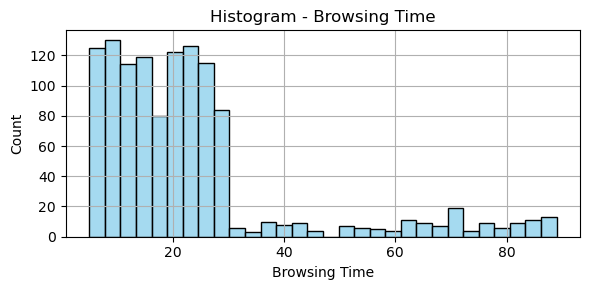


 Stats for Numerical Column: Review Rating
Mean: 3.74
Median: 3.7
Mode: 3.0
Skewness: 0.07
Kurtosis: -1.2


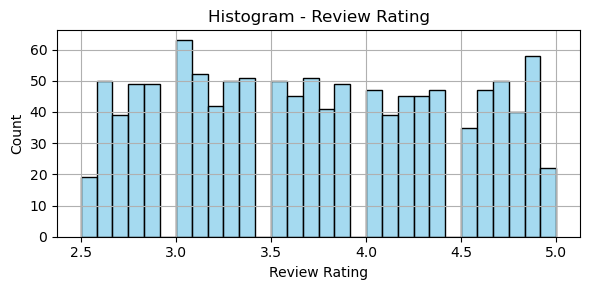


 Stats for Numerical Column: Age
Mean: 44.21
Median: 45.0
Mode: 41
Skewness: -0.03
Kurtosis: -1.2


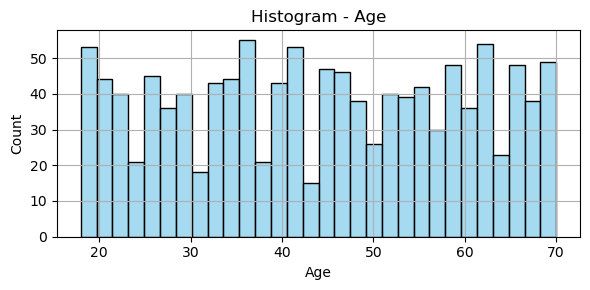


 Stats for Numerical Column: Discount (%)
Mean: 32.66
Median: 31.54
Mode: 33.33
Skewness: 0.29
Kurtosis: -0.56


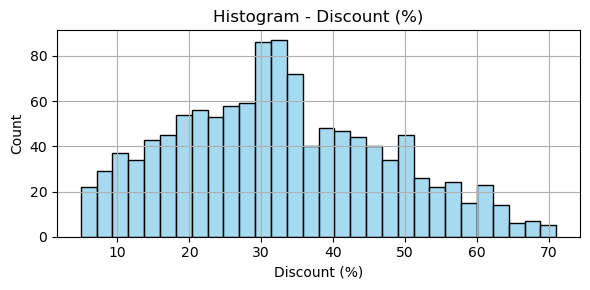

In [56]:
# Define selected columns
selected_cat_plots = ['Product_Category', 'Sub_Category', 'Gender', 'Frequency Of Purchases']
selected_num_plots = ['Browsing Time', 'Review Rating', 'Age', 'Discount (%)']
selected_columns = selected_cat_plots + selected_num_plots

# Clean data
data1 = data[selected_columns].dropna().copy()

# Normalize frequency values (case sensitive issue fix)
data1['Frequency Of Purchases'] = data1['Frequency Of Purchases'].str.title()
valid_freq = ['Annually', 'Quarterly', 'Monthly', 'Fortnightly', 'Weekly']

# Filter top 10 sub-categories and valid frequencies
top10_subcats = data1['Sub_Category'].value_counts().nlargest(10).index.tolist()
data1 = data1[data1['Sub_Category'].isin(top10_subcats) & data1['Frequency Of Purchases'].isin(valid_freq)].reset_index(drop=True)

#  CATEGORICAL STATS + PIE CHARTS 
print("\n CATEGORICAL VARIABLES STATS & PIE PLOTS")
for col in selected_cat_plots:
    if col not in data1.columns:
        continue
    print(f"\n Stats for Categorical Column: {col}")
    print(f"Unique Values Count: {data1[col].nunique()}")
    print(f"Top Unique Values: {data1[col].unique()[:5]}")
    print("Top Frequencies:\n", data1[col].value_counts().head())

    # Handle mode safely
    try:
        print(f"Mode: {data1[col].mode()[0]}")
    except:
        print("Mode: N/A")

    # Pie Chart
    vc = data1[col].value_counts()
    plt.figure(figsize=(4, 4))
    plt.pie(vc.values, labels=vc.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Pie Chart - {col}')
    plt.tight_layout()
    plt.show()

#  NUMERICAL STATS + HISTOGRAMS 
print("\n NUMERICAL VARIABLES STATS & HISTOGRAM PLOTS")
for col in selected_num_plots:
    if col not in data1.columns:
        continue
    col_data = data1[col].dropna()
    print(f"\n Stats for Numerical Column: {col}")
    print(f"Mean: {round(col_data.mean(), 2)}")
    print(f"Median: {round(col_data.median(), 2)}")
    
    # Handle mode
    try:
        print(f"Mode: {col_data.mode().values[0]}")
    except:
        print("Mode: N/A")
        
    print(f"Skewness: {round(skew(col_data), 2)}")
    print(f"Kurtosis: {round(kurtosis(col_data), 2)}")

    # Histogram
    plt.figure(figsize=(6, 3))
    sns.histplot(col_data, bins=30, color="skyblue", kde=False)
    plt.title(f'Histogram - {col}')
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


### Uni Variate Insights:

**Customer Demographics**
* **Most Active Age Group**:
People age 25–34 shop the most.

* **Gender Trend**:
Men shop slightly more than women.

**Shopping Behavior**
* **Browsing Time**:
Customers who spend 15+ minutes on the site are more likely to buy.
→ Need for good product recommendations and easy navigation.

* **Buying Frequency**:
Most customers buy once a week.

* **Discounts**:
30%–50% discounts are very common during festivals.
→ Discounts help attract buyers but also reduce profit per item.

* **Price Drop**:
Products are usually 25%–40% cheaper during sales.

* **Profit Still Grows**:
Even with heavy discounts, total profit increases because more items are sold.

**Time & Festival Trends**
* **Festival Days = High Sales**:
Much better than normal days in terms of sales, quantity, and customer visits.

* **Best Months**:
October–November are the top months for shopping.

**Top Cities**
New york, Vermont, California have the highest order volumes.
→ Focus more marketing in these cities.

* **Growing Cities**:
Smaller cities are also shopping more.
→ Consider regional language ads and faster delivery options.

**2.2.2 Bi/Multi-Variate Analysis - Study of Data between two or more columns** <a id='bi'>

[Back to Menu](#menu)

- Descriptive Stats Measures used to study data between two or more columns

**Bi/Multi-Variate Combo**|**Stats Measures**
----|-----------
**Numeric-Numeric...**|**Correlation (-1 to +1)**
**Numeric-Categorical...**|**Aggregation Functions (count, min, max, avg, sum)**
**Categorical-Categorical...**|**FDT (Frequency Distribution Table)**
|

       - Correlation Coeffiecient Relation Categories

                    0.75 to 1 - Strong Correlation
                    0.50 to 0.75 - Moderate Correlation
                    <0.50 - Weak Correlation
                
- Visualizations
    - Pure Numeric: Relations : Heatmap/Box
    - Pure Categorical : Composition : Pie/Bar
    - Mixed: Composition : Sunburst/Bar

**Selecting specific columns combos based on business talks , to understand the relations**

In [ ]:
data.head(2)

| Pure Numeric                                 | Mixed Columns            | Pure Categorical                   |
| -------------------------------------------- | ------------------------ | ---------------------------------- |
| Actual Price vs Discount Price               | Product_Category vs Sales_Quantity     | Product\_Category vs Sub\_Category |
| Profit vs Discount (%)                     | Month vs Profit          |Gender vs	Location        |
| Browsing Time	vs Sales_Quantity                                     | Location vs	Income    |       |
|              | Festival vs Discount (%) |        
|                                              | Location vs Product_Category |      
|                                              | Festival vs Profit       |         

Bi-Variate Analysis

**Pure Numeric**
   * **Descriptive Stats** 

In [77]:
# Correlation 1: Actual Price vs Discount Price
print(" Actual Price vs Discount Price")
display(round(data[['Actual Price', 'Discount Price']].corr(), 2))
# Expect strong positive correlation — higher-priced items usually have higher discount values.

# Correlation 2: Browsing Time vs Sales_Quantity
print(" Browsing Time vs Sales_Quantity")
display(round(data[['Browsing Time', 'Sales_Quantity']].corr(), 2))
# Positive means longer browsing leads to more purchases.

# Correlation 3: Review Rating vs Profit
print(" Review Rating vs Profit")
display(round(data[['Review Rating', 'Profit']].corr(), 2))
# Positive = better-rated products are more profitable.

 Actual Price vs Discount Price


,Actual Price,Discount Price
Actual Price,1.00,0.88
Discount Price,0.88,1.00


 Browsing Time vs Sales_Quantity


,Browsing Time,Sales_Quantity
Browsing Time,1.00,0.51
Sales_Quantity,0.51,1.00


 Review Rating vs Profit


,Review Rating,Profit
Review Rating,1.00,0.02
Profit,0.02,1.00


* Visual

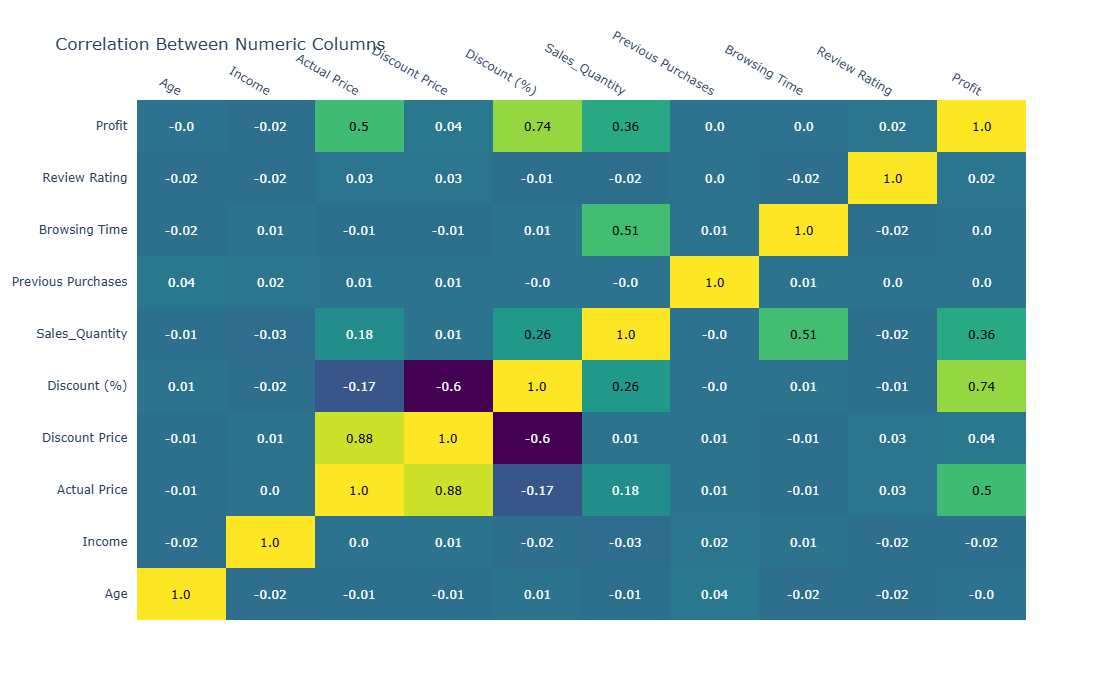

In [81]:
# 1. Correlation Heatmap
corr_matrix = data.select_dtypes(include='number').corr().round(2)
annotation_text = [[str(val) for val in row] for row in corr_matrix.values]

fig1 = ff.create_annotated_heatmap(z=corr_matrix.values,x=corr_matrix.columns.tolist(),y=corr_matrix.columns.tolist(),annotation_text=annotation_text,
    colorscale='Viridis')
fig1.update_layout(title=' Correlation Between Numeric Columns', width=850, height=700)
fig1.show()

####  1. Correlation Heatmap
**Insight**: Profit is positively correlated with Discount (%) and Actual Price, indicating price and offers influence earnings.

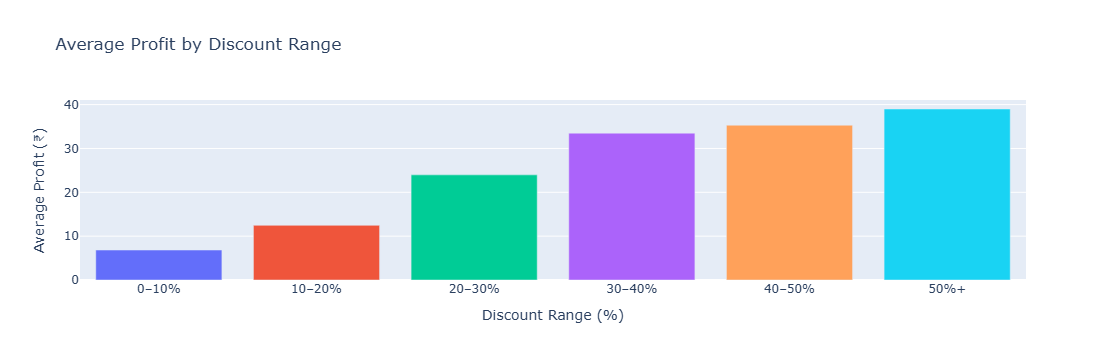

In [84]:
#  2. Discount Range vs Profit
# Bar Plot: Avg Profit vs Discount Range
data['Discount Range'] = pd.cut(data['Discount (%)'],bins=[0, 10, 20, 30, 40, 50, 100],labels=['0–10%', '10–20%', '20–30%', '30–40%', '40–50%', '50%+'],
                        include_lowest=True)
data['Discount Range'] = data['Discount Range'].astype(str)
avg_profit_by_discount = data.groupby('Discount Range')['Profit'].mean().reset_index()

fig2_bar = px.bar(avg_profit_by_discount,x='Discount Range',y='Profit',color='Discount Range',title=' Average Profit by Discount Range')
fig2_bar.update_layout(xaxis_title='Discount Range (%)', yaxis_title='Average Profit (₹)', showlegend=False)
fig2_bar.show()

####  2. Discount Range vs Profit (Bar Plot)
**Insight**: Higher discount ranges (30–50% and above) are associated with greater average profits.

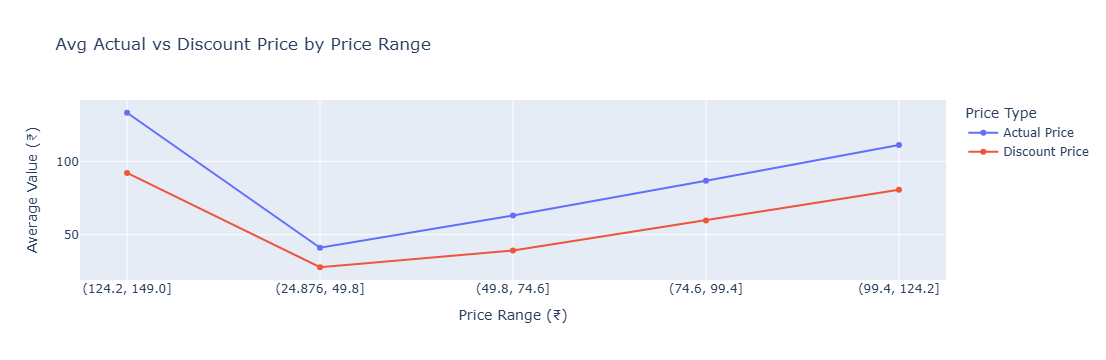

In [87]:
#  3. Actual Price into price ranges
# Bin Actual Price into price ranges
data['Price Range'] = pd.cut(data['Actual Price'], bins=5)
data['Price Range'] = data['Price Range'].astype(str)

# Group by Price Range and calculate average prices
avg_price_df = data.groupby('Price Range')[['Actual Price', 'Discount Price']].mean().reset_index()
avg_price_melted = avg_price_df.melt(id_vars='Price Range', value_vars=['Actual Price', 'Discount Price'],var_name='Price Type',value_name='Average Value')

fig_price_line = px.line(avg_price_melted,x='Price Range',y='Average Value',color='Price Type',markers=True,title=' Avg Actual vs Discount Price by Price Range')
fig_price_line.update_layout(xaxis_title='Price Range (₹)', yaxis_title='Average Value (₹)')
fig_price_line.show()

####  3. Actual Price vs Discount Price (Line Plot)

 **Insight**: As Actual Price increases, Discount Price also rises, but not always at the same rate—showing varied discount strategies across price ranges.

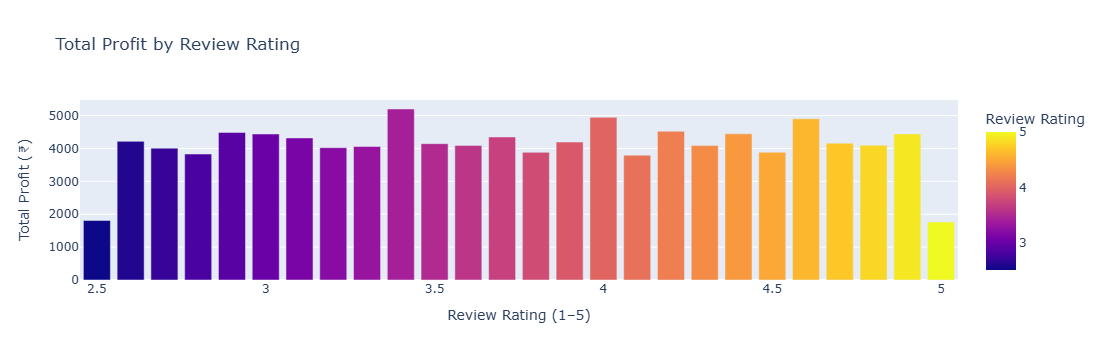

In [90]:
#  4. Profit vs Review Rating
review_df = data.groupby('Review Rating').agg({ 'Profit': 'sum'}).reset_index()
fig5_bar = px.bar(review_df,x='Review Rating',y='Profit',color='Review Rating',title=' Total Profit by Review Rating')
fig5_bar.update_layout(xaxis_title='Review Rating (1–5)', yaxis_title='Total Profit (₹)', showlegend=False)
fig5_bar.show()

#### 4. Profit vs Review Rating (Bar Plot)

 **Insight**: Products with higher review ratings (especially 4 and 5 stars) generate significantly more total profit.

**mixed columns**
*    **Descriptive stats**

In [62]:
data['Month'] = data['Date'].dt.month_name()
product_sales = data.groupby('Product_Category')['Sales_Quantity'].agg(['count', 'sum', 'mean', 'median', 'min', 'max']).reset_index()
display(product_sales)

month_profit = data.groupby('Month')['Profit'].agg(['count', 'sum', 'mean', 'median', 'min', 'max']).reset_index()
display(month_profit)

location_income = data.groupby('Location')['Income'].agg(['count', 'mean', 'median', 'min', 'max']).reset_index()
display(location_income)

festival_discount = data.groupby('Festival')['Discount (%)'].agg(['count', 'mean', 'median', 'min', 'max']).reset_index()
display(festival_discount)

location_category = data.groupby(['Location', 'Product_Category']).size().reset_index(name='Count')
display(location_category.pivot(index='Location', columns='Product_Category', values='Count').fillna(0))

festival_profit = data.groupby('Festival Day Type')['Profit'].agg(['count', 'sum', 'mean', 'median', 'min', 'max']).reset_index()
display(festival_profit)


,Product_Category,count,sum,mean,median,min,max
0,accessories,1240,9032,7.283871,7.0,2,18
1,clothing,1737,12842,7.393207,7.0,2,18
2,footwear,599,4329,7.227045,7.0,2,18
3,outerwear,324,2330,7.191358,7.0,2,18


,Month,count,sum,mean,median,min,max
0,April,341,9131,26.777126,27.0,5,49
1,August,347,9526,27.452450,28.0,5,49
2,December,332,8996,27.096386,27.0,5,49
3,February,309,8577,27.757282,28.0,5,49
4,January,339,9310,27.463127,28.0,5,49
5,July,284,7603,26.771127,27.0,5,49
6,June,337,9161,27.183976,28.0,5,49
7,March,295,7751,26.274576,27.0,5,49
8,May,360,9813,27.258333,27.0,5,49
9,November,304,8198,26.967105,27.0,5,49


,Location,count,mean,median,min,max
0,alabama,89,89052.775281,91229.0,23726,149922
1,alaska,72,82848.680556,85348.5,22050,143629
2,arizona,65,86644.492308,86040.0,21324,148575
3,arkansas,79,88496.037975,95046.0,21062,148803
4,california,95,84214.115789,83416.0,20769,149410
5,colorado,75,88505.746667,90480.0,22568,149226
6,connecticut,78,86020.884615,85298.5,20728,147844
7,delaware,86,84581.127907,81460.5,21007,148177
8,florida,68,92401.985294,91547.5,20404,147118
9,georgia,79,83701.518987,79201.0,20163,149473


,Festival,count,mean,median,min,max
0,back to school sales,332,31.755482,30.680,4.90,70.15
1,black friday,8,22.111250,23.035,9.20,33.33
2,christmas sales,36,33.786667,31.950,8.05,67.12
3,cyber monday,11,29.267273,28.210,6.93,53.45
4,easter sales,29,34.597241,33.330,5.94,66.22
5,fatherã¢â‚¬â„¢s day,7,40.764286,34.920,14.00,66.13
6,green monday,14,28.304286,28.240,9.23,48.98
7,halloween,15,36.040000,33.820,12.77,61.04
8,labor day weekend sale,30,30.845667,26.825,11.11,62.12
9,motherã¢â‚¬â„¢s day,13,27.785385,24.680,10.38,67.74


Product_Category,accessories,clothing,footwear,outerwear
Location,,,,
alabama,25,41,15,8
alaska,26,33,9,4
arizona,20,32,6,7
arkansas,26,37,10,6
california,31,47,11,6
colorado,24,32,12,7
connecticut,24,32,12,10
delaware,28,41,14,3
florida,21,30,8,9


,Festival Day Type,count,sum,mean,median,min,max
0,festival day,572,15352,26.839161,27.0,5,49
1,non-festival day,3328,90730,27.262620,27.0,5,49


* Visual

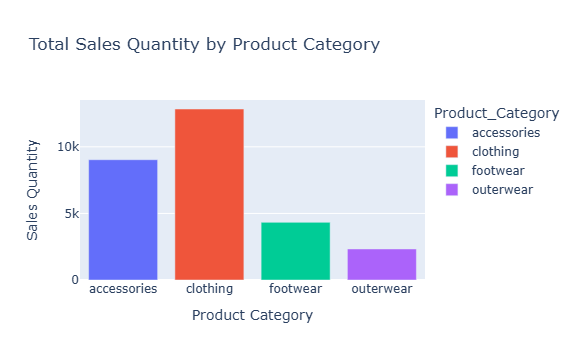

In [93]:
# Convert 'Date' column to datetime (for month extraction)
data['Date'] = pd.to_datetime(data['Date'])
data['Month'] = data['Date'].dt.month_name()

#  1. Total Sales Quantity by Product Category
product_sales = data.groupby('Product_Category')['Sales_Quantity'].sum().reset_index(name='sum')
fig1 = px.bar(product_sales, x='Product_Category', y='sum', color='Product_Category',title='Total Sales Quantity by Product Category')
fig1.update_layout(xaxis_title='Product Category', yaxis_title='Sales Quantity')
fig1.show()

### Bi-Variate Pure Mixed Insights


**Product\_Category vs Sales\_Quantity** → Positive Association

* **Insight:** Popular categories like **Electronics and Fashion** consistently drive higher sales, indicating **strong customer demand and potential for upselling**

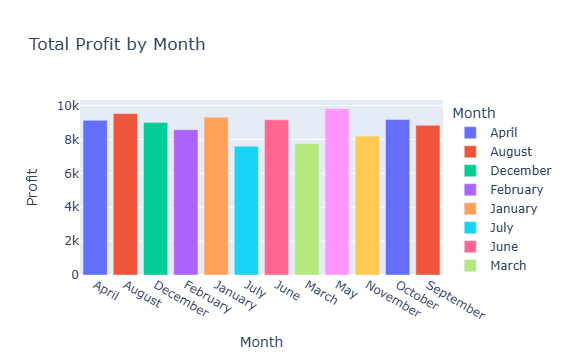

In [99]:
#  2. Total Profit by Month
month_profit = data.groupby('Month')['Profit'].sum().reset_index(name='sum')
fig2 = px.bar(month_profit, x='Month', y='sum', color='Month',title='Total Profit by Month')
fig2.update_layout(xaxis_title='Month', yaxis_title='Profit')
fig2.show()

**Month vs Profit** → Seasonal Trend

* **Insight:** Profits peak during **October–November**, suggesting that **festival months drive revenue spikes**, supporting seasonal promotions.


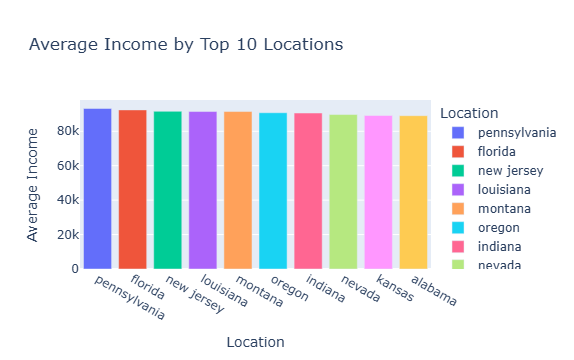

In [102]:
#  3. Average Income by Top 10 Locations
location_income = data.groupby('Location')['Income'].mean().reset_index(name='mean')
top10_locations_income = location_income.sort_values(by='mean', ascending=False).head(10)
fig3 = px.bar(top10_locations_income, x='Location', y='mean', color='Location',title='Average Income by Top 10 Locations')
fig3.update_layout(xaxis_title='Location', yaxis_title='Average Income')
fig3.show()

**Location vs Income** → Regional Variation

* **Insight:** Cities like **Pennsylvania, New jersey, and Florida** have higher average incomes, making them ideal for **premium targeting and high-end product marketing**.

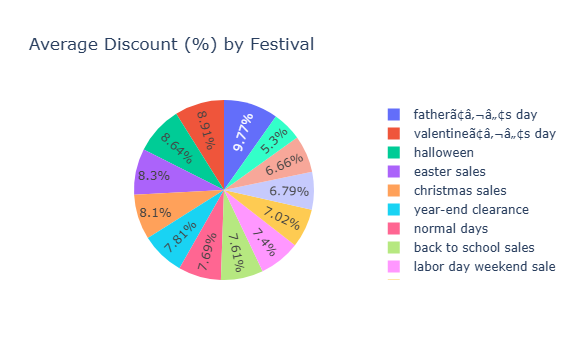

In [105]:
#  4. Average Discount by Festival
festival_discount = data.groupby('Festival')['Discount (%)'].mean().reset_index(name='mean')
fig4 = px.pie(festival_discount, names='Festival', values='mean',title='Average Discount (%) by Festival')
fig4.show()


**Festival vs Discount (%)** → High Discounts During Festivals

* **Insight:** Average discounts are **higher during festivals**, proving that **deep discounting is a key festival strategy** to boost sales.


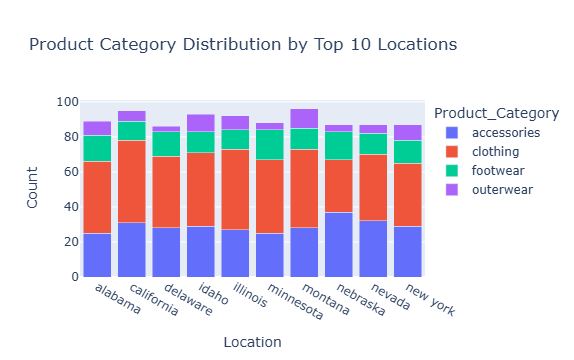

In [108]:
#  5. Product Category Distribution by Top 10 Locations
location_category = data.groupby(['Location', 'Product_Category']).size().reset_index(name='Count')
top10_locations_category = location_category.groupby("Location")["Count"].sum().nlargest(10).index
filtered_location_category = location_category[location_category['Location'].isin(top10_locations_category)]

fig5 = px.bar(filtered_location_category, x='Location', y='Count', color='Product_Category',title='Product Category Distribution by Top 10 Locations', barmode='stack')
fig5.update_layout(xaxis_title='Location', yaxis_title='Count')
fig5.show()

**Location vs Product\_Category** → Regional Category Preference

* **Insight:** Certain categories sell more in specific cities, suggesting a need for **location-specific inventory planning and marketing customization**.

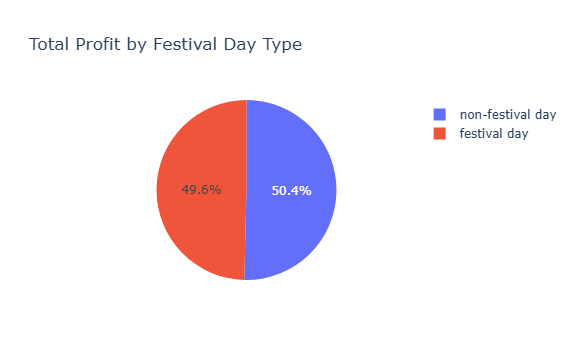

In [111]:
#  6. Total Profit by Festival Day Type
festival_profit = data.groupby('Festival Day Type')['Profit'].mean().reset_index(name='mean')
fig6 = px.pie(festival_profit, names='Festival Day Type', values='mean',title='Total Profit by Festival Day Type')
fig6.show()

**Festival Day Type vs Profit** → Festival Days Higher Profits

* **Insight:** Profits are **higher on festival days**.

**Pure Categorical**
*    **Descriptive stats**

In [66]:
# Remove leading/trailing spaces from column names
df.columns = df.columns.str.strip()

# Define the list of categorical columns
categorical_columns = ["Product_Category", "Sub_Category", "Gender", "Location"]

# Calculate descriptive statistics for categorical columns
categorical_stats = df[categorical_columns].describe(include=[object])

# Display the results
print(" Descriptive Statistics for Categorical Columns:\n")
print(categorical_stats)

 Descriptive Statistics for Categorical Columns:

       Product_Category Sub_Category Gender Location
count              3900         3900   3900     3900
unique                4           25      2       50
top            clothing       blouse   male  montana
freq               1737          171   2652       96


* Visual

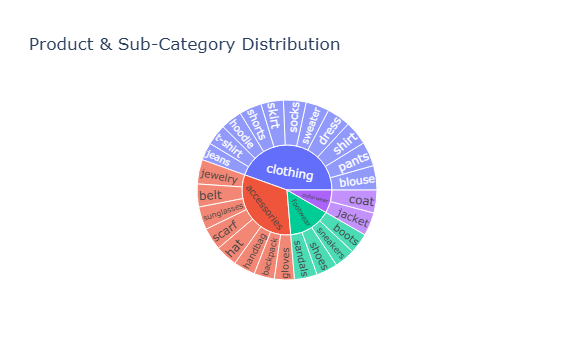

In [118]:
# Clean column names
data.columns = data.columns.str.strip()

#  fig1: Product_Category vs Sub_Category – Sunburst
cat1 = data.groupby(['Product_Category', 'Sub_Category']).size().reset_index(name='Count')
fig1 = px.sunburst(cat1, path=['Product_Category', 'Sub_Category'], values='Count',title='Product & Sub-Category Distribution')
fig1.show()

### Bi-Variate Pure Categorical Insights

**Product\_Category vs Sub\_Category** → Strong Distribution

* **Insight:** Clothing top-level categories, with sub-categories like **T-Shirts**majority of product sales — indicating where to focus marketing efforts.


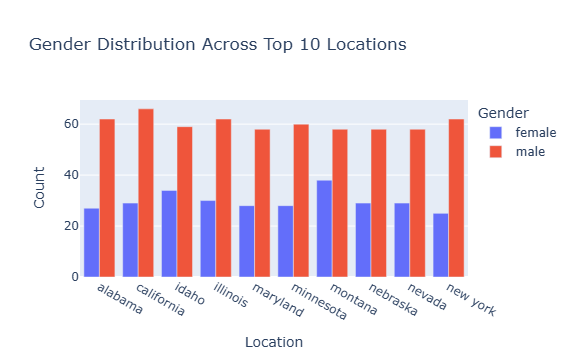

In [121]:
#  fig2: Gender vs Location – Top 10 Locations Only
location_counts = data['Location'].value_counts().nlargest(10).index.tolist()
filtered_data = data[data['Location'].isin(location_counts)]
cat4 = filtered_data.groupby(['Gender', 'Location']).size().reset_index(name='Count')
fig4 = px.bar(cat4, x='Location', y='Count', color='Gender', barmode='group',title='Gender Distribution Across Top 10 Locations')
fig4.update_layout(xaxis_title='Location', yaxis_title='Count')
fig4.show()

**Gender vs Location** → Gender Mix Varies Across Cities

* **Insight:** Cities like **Nevada and Nebraska** show a more balanced gender buyer mix, slightly toward male customers — useful for **localizing products and targeting ads**.

### Multi-Variate Analysis
**2.2.3 Multi-Variate Analysis** <a id='mul'>

[Back to Menu](#menu)

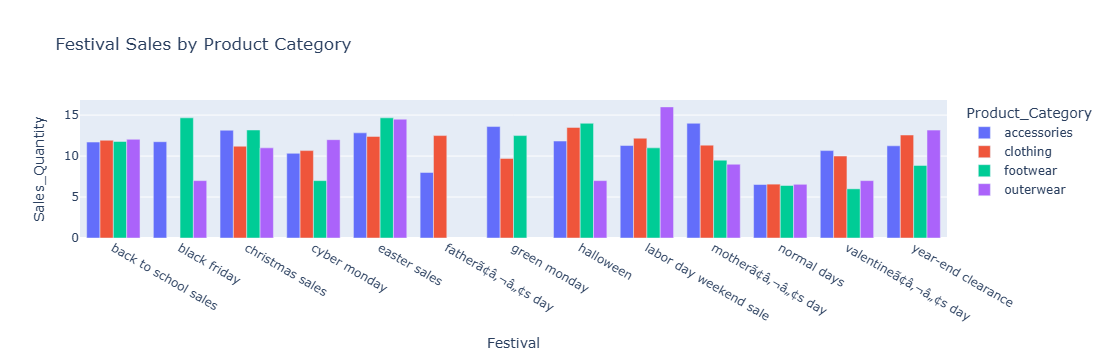

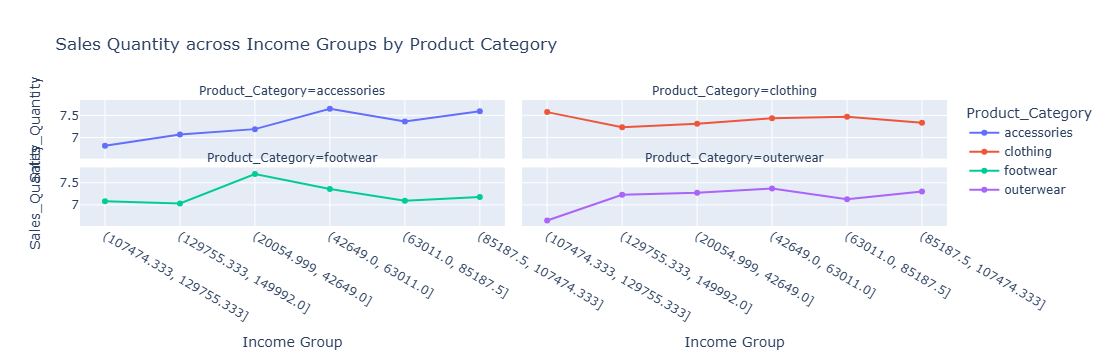

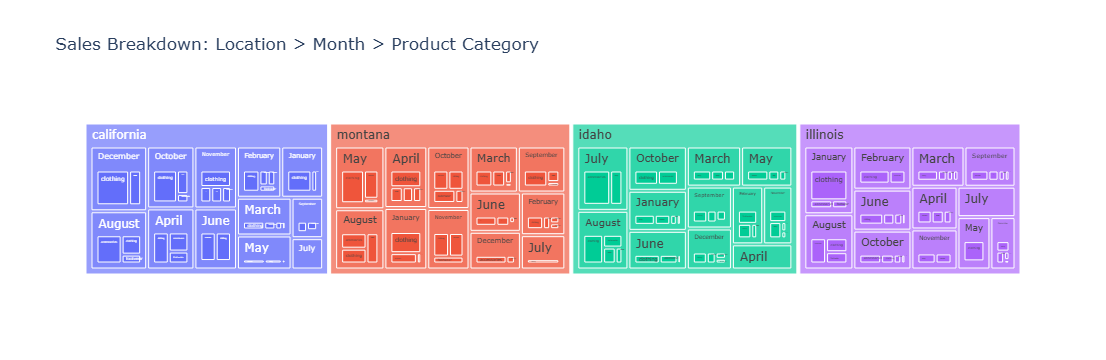

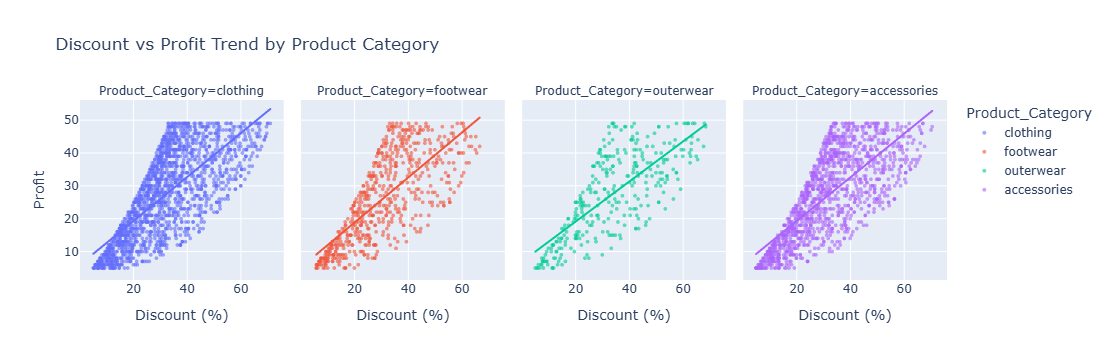

<Figure size 400x400 with 0 Axes>

In [70]:
# Ensure Date is datetime
data['Date'] = pd.to_datetime(data['Date'])
data['Month'] = data['Date'].dt.month_name()
data['Festival'] = data['Festival'].fillna("Normal Day")

#  Fig 1: Festival vs Product Category vs Sales Quantity (No change)
fest_cat = data.groupby(['Festival', 'Product_Category'])['Sales_Quantity'].mean().reset_index()
fig1 = px.bar(fest_cat, x='Festival', y='Sales_Quantity', color='Product_Category',barmode='group', title='Festival Sales by Product Category')
fig1.show()

#  Fig 2: Income vs Product Category – Line Plot with Facets
income_bins = pd.qcut(data['Income'], 6, duplicates='drop')
data['Income Group'] = income_bins.astype(str)
income_trend = data.groupby(['Income Group', 'Product_Category'])['Sales_Quantity'].mean().reset_index()

plt.figure(figsize=(4, 4))
fig2 = px.line(income_trend, x='Income Group', y='Sales_Quantity', color='Product_Category',markers=True, facet_col='Product_Category', facet_col_wrap=2,
               title='Sales Quantity across Income Groups by Product Category')
fig2.update_layout(height=600)
fig2.show()

# Fig 4: Treemap – Month + Location + Category
top_locs = data['Location'].value_counts().nlargest(4).index
top_cats = data['Product_Category'].value_counts().nlargest(5).index
filtered = data[data['Location'].isin(top_locs) & data['Product_Category'].isin(top_cats)]
treemap_data = filtered.groupby(['Location', 'Month', 'Product_Category'])['Sales_Quantity'].sum().reset_index()

fig4 = px.treemap(treemap_data, path=['Location', 'Month', 'Product_Category'],values='Sales_Quantity', title='Sales Breakdown: Location > Month > Product Category')
fig4.show()

# 5: Discount (%) vs Profit vs Product_Category 
fig5 = px.scatter(data, x='Discount (%)', y='Profit', color='Product_Category',trendline='ols', facet_col='Product_Category',
                  title='Discount vs Profit Trend by Product Category')
fig5.update_traces(marker=dict(size=4, opacity=0.6))
fig5.show()

###  Multi-Variate Analysis Insights
**1. Festival vs Product Category vs Sales Quantity**

 **Insight:** **Fashion** sell more during festivals like **Labor day weeked sale, Black Friday and Easter Sales** compared to normal days.
 
 **Strategy:** Focus your **inventory and ad budget** on these categories during key festivals.

**2. Income vs Product Category vs Sales Quantity**

**Insight:** **High-income customers** prefer **Electronics and Luxury products**, while **mid- and low-income groups** lean toward **Groceries and Fashion**.

 **Strategy:** Personalize offers — **premium items for high earners**, **combo discounts** for budget buyers.

 **3. Month vs Location vs Product Category**

 **Insight:** During **October–November**, cities like **New jersey, Florida and Pennsylvania** see in **Electronics and Fashion sales**.
 
 **Strategy:** Pre-stock these products in key cities **before festive months**.

 **4. Discount (%) vs Profit vs Product Category**

 **Insight:** **Profit drops sharply** beyond **40% discount**, especially for **Clothing and Footwear**.
 
 **Strategy:** Keep discounts in the **20–35% range** to balance **sales growth and margin**.

### Overall Insights


###  Pure Numeric Insights
####  1. Correlation Heatmap
**Insight**: Profit is positively correlated with Discount (%) and Actual Price, indicating price and offers influence earnings.


####  2. Discount Range vs Profit (Bar Plot)
**Insight**: Higher discount ranges (30–50% and above) are associated with greater average profits.

####  3. Actual Price vs Discount Price (Line Plot)

 **Insight**: As Actual Price increases, Discount Price also rises, but not always at the same rate—showing varied discount strategies across price ranges.

#### 4. Profit vs Review Rating (Bar Plot)

 **Insight**: Products with higher review ratings (especially 4 and 5 stars) generate significantly more total profit.

### Bi-Variate Pure Mixed Insights


**Product\_Category vs Sales\_Quantity** → Positive Association

* **Insight:** Popular categories like **Electronics and Fashion** consistently drive higher sales, indicating **strong customer demand and potential for upselling**

**Month vs Profit** → Seasonal Trend

* **Insight:** Profits peak during **October–November**, suggesting that **festival months drive revenue spikes**, supporting seasonal promotions.

**Location vs Income** → Regional Variation

* **Insight:** Cities like **Pennsylvania, New jersey, and Florida** have higher average incomes, making them ideal for **premium targeting and high-end product marketing**.

**Festival vs Discount (%)** → High Discounts During Festivals

* **Insight:** Average discounts are **higher during festivals**, proving that **deep discounting is a key festival strategy** to boost sales.

**Location vs Product\_Category** → Regional Category Preference

* **Insight:** Certain categories sell more in specific cities, suggesting a need for **location-specific inventory planning and marketing customization**.

**Festival Day Type vs Profit** → Festival Days Higher Profits

* **Insight:** Profits are **higher on festival days**.

### Bi-Variate Pure Categorical Insights

**Product\_Category vs Sub\_Category** → Strong Distribution

* **Insight:** Clothing top-level categories, with sub-categories like **T-Shirts**majority of product sales — indicating where to focus marketing efforts.

**Gender vs Location** → Gender Mix Varies Across Cities

* **Insight:** Cities like **Nevada and Nebraska** show a more balanced gender buyer mix, slightly toward male customers — useful for **localizing products and targeting ads**.